In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
np.random.seed(62)

In [4]:
def plot_sphereical_func(f, theta, phi):
    # theta, phi = np.meshgrid(theta, phi)
    real_part = f.real
    # print(real_part)
    # Convert spherical to Cartesian coordinates for surface plotting
    r = np.abs(f.real)  # Magnitude as radius
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    # Plotting the sphere with Matplotlib
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(121, projection='3d')

    # Use the absolute value of f.real for color mapping
    color_vals = (real_part - real_part.min()) / (real_part.max() - real_part.min())  # Color based on magnitude
    surface = ax.plot_surface(
        x, y, z, 
        rstride=1, cstride=1, facecolors=plt.cm.coolwarm(color_vals),
        antialiased=True, alpha=0.9
    )
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
    # ax.set_title(f"Spherical Harmonic $Y_{l}^{m}$", fontsize=16)

    # Correct colorbar for the magnitude of f.real
    mappable = plt.cm.ScalarMappable(cmap='coolwarm')
    mappable.set_array(color_vals)
    fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10, label="|Y|")

    # Second Plot: Real part of the spherical harmonic
    ax2 = fig.add_subplot(122, projection='3d')
    
    # Convert spherical to Cartesian coordinates for plotting the real part
    x_real = np.sin(theta) * np.cos(phi)
    y_real = np.sin(theta) * np.sin(phi)
    z_real = np.cos(theta)

    # Plot the surface, using the real part of Y_l^m as the color
    surface2 = ax2.plot_surface(
        x_real, y_real, z_real, 
        facecolors=plt.cm.coolwarm(color_vals / np.max(color_vals)),
        rstride=1, cstride=1, antialiased=True, linewidth=0, alpha=0.9
    )

    # Add a colorbar linked to the real part
    mappable = plt.cm.ScalarMappable(cmap='coolwarm')
    mappable.set_array(real_part)
    fig.colorbar(mappable, ax=ax2, shrink=0.5, aspect=10, label="Real Part of $Y_l^m$")

    # Label and adjust plot
    # ax2.set_title(f"Real Part of $Y_{{{l}}}^{{{m}}}$", fontsize=16)
    ax2.set_xlabel("X", fontsize=12)
    ax2.set_ylabel("Y", fontsize=12)
    ax2.set_zlabel("Z", fontsize=12)
    ax2.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

    plt.tight_layout()
    plt.show()

In [5]:
def plot_healpix(healpix_data, theta, phi):
    # theta, phi = np.meshgrid(theta, phi)
    # Convert spherical coordinates to Cartesian coordinates for plotting
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # Normalize data for color mapping
    norm_data = (healpix_data - np.min(healpix_data)) / (np.max(healpix_data) - np.min(healpix_data))

    # Plotting the sphere
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=norm_data, cmap='coolwarm', marker='o', s=8)

    # Add color bar
    # cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
    # cbar.set_label('Healpix Data')

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

   # Set aspect ratio and axes scaling
    ax.set_box_aspect([1, 1, 1])  # Aspect ratio 1:1:1
    # set_axes_equal_3d(ax)

    plt.title('3D Sphere Surface from Healpix Data')
    plt.show()

In [6]:

# Define HEALPix resolution
nside = 32  # Set a suitable Nside value (a power of 2)
npix = hp.nside2npix(nside)

# # Generate theta and phi for pixel centers
theta, phi = hp.pix2ang(nside, np.arange(npix))

# Create a complex-valued map (example map, you could replace it with your own)
sphere_f = np.zeros(npix, dtype=np.complex128)

# Set max_l for spherical harmonics
max_l = 10

theta2 = np.linspace(0, 2 * np.pi, 200)  # Azimuthal angle
phi2 = np.linspace(0, np.pi, 100)        # Polar angle
theta2, phi2 = np.meshgrid(theta2, phi2)


k = 0
sphere_f_grid = []
l_m = []

for i in range(2):
    l = i + 4 #int(np.random.normal(max_l, max_l-3))
    m = int(np.random.normal(0,l))#int(np.random.normal(max_l-2, max_l-4))
    # m = l - 2
    # l, m = abs(l), abs(m)
    
    if abs(l)>=abs(m):
        # Compute spherical harmonics
        Y_lm = sph_harm(m, l, phi, theta)
        # print(l, m)
        # print(Y_lm)
        Y_lm2 = sph_harm(m, l, phi2, theta2)
        if k == 0:
            sphere_f += Y_lm
            sphere_f_grid.append(np.array(Y_lm2))
            sphere_f_grid = np.array(sphere_f_grid[0])
            k = 1
            l_m.append((l,m))
        else:
            sphere_f += Y_lm
            sphere_f_grid += np.array(Y_lm2)
            l_m.append((l,m))


print(l_m)
# print(sphere_f_grid)
# print (Y_lm, sphere_f, sphere_f_grid)



[(4, 0), (5, -2)]


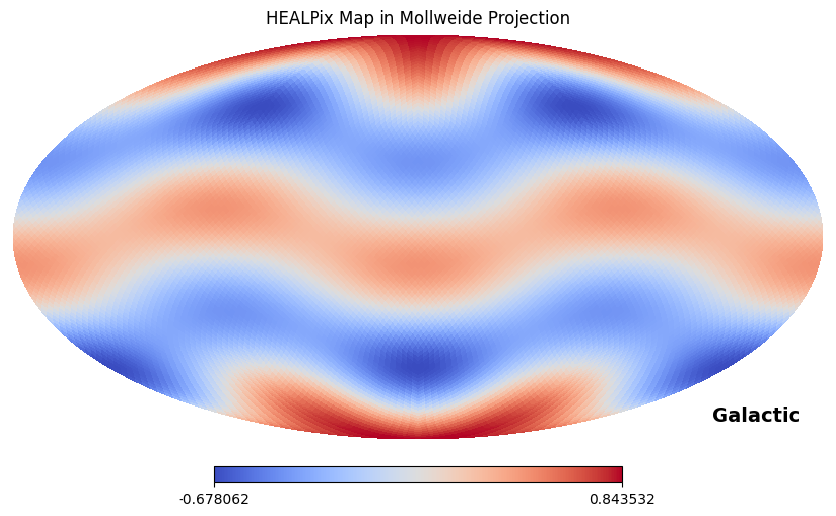

In [7]:

# Plot the map using Mollweide projection
hp.mollview(sphere_f.real, coord=["G"], title="HEALPix Map in Mollweide Projection", cmap='coolwarm')
plt.show()

# # Alternatively, plot in Cartesian projection
# hp.cartview(sphere_f.real, title="HEALPix Map in Cartesian Projection", cmap='coolwarm')
# plt.show()

/home/akshank/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/akshank/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:4590: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


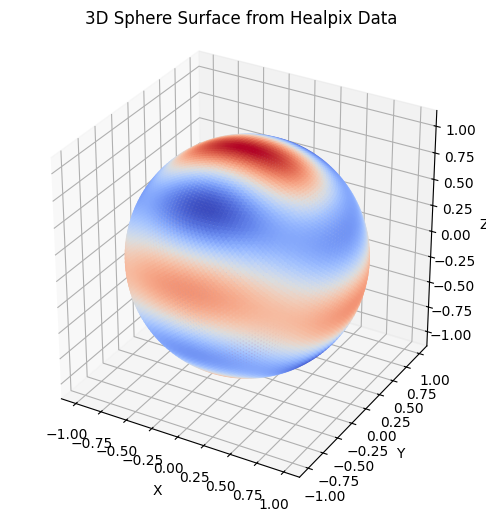

In [8]:
plot_healpix(sphere_f, theta, phi)

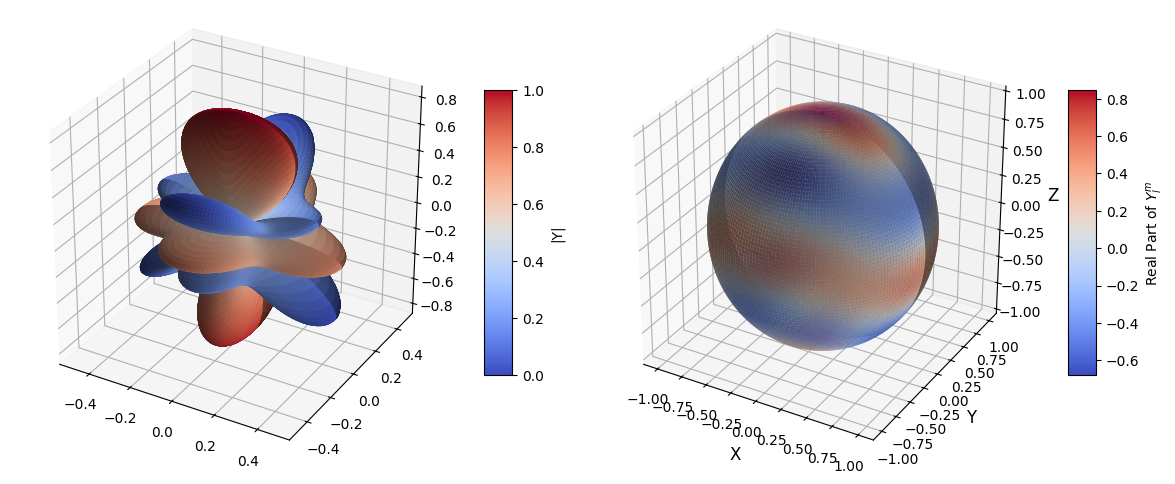

In [9]:
plot_sphereical_func(sphere_f_grid, theta2, phi2)

In [10]:
def verify_spherical_harmonic_orthonormality(l1, m1, l2, m2, nside=32):
    npix = hp.nside2npix(nside)  # Number of pixels
    theta, phi = hp.pix2ang(nside, np.arange(npix))  # Angles for each pixel

    # Compute the spherical harmonics
    Y_l1m1 = sph_harm(m1, l1, phi, theta)
    Y_l2m2 = sph_harm(m2, l2, phi, theta)
    Y_l3m3 = sph_harm(m1+m2, l1+l2, phi, theta)

    # Integrate over the sphere using pixel weights
    weights = hp.nside2pixarea(nside)  # Pixel area
    integral = np.sum((7*Y_l1m1 + 2*Y_l2m2 + 2*Y_l3m3)  * np.conjugate(Y_l1m1) * weights)

    # Theoretical delta result
    delta = 1 if (l1 == l2 and m1 == m2) else 0

    return integral, delta


# Test the relation for some (l, m) values
l1, m1 = 2, 1
l2, m2 = 3, 1
numerical_result, theoretical_delta = verify_spherical_harmonic_orthonormality(l1, m1, l2, m2)

print(f"Numerical Integral: {numerical_result:.6f}")
print(f"Theoretical Delta: {theoretical_delta}")
print(f"Verification: {'Passed' if np.isclose(np.round(numerical_result,1), theoretical_delta) else 'Failed'}")


Numerical Integral: 7.000704+0.000000j
Theoretical Delta: 0
Verification: Failed


In [11]:
def calculate_alm(sphere_f, l_max, n_side = nside):
    npix = hp.nside2npix(n_side)  # Number of pixels
    theta, phi = hp.pix2ang(nside, np.arange(npix))  # Angles for each pixel

    weights = hp.nside2pixarea(nside)  
    alm = {}

    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            # Compute Y_lm* at all pixel locations
            Y_l2m2 = sph_harm(m, l, phi, theta)
            integral = np.sum(sphere_f  * np.conjugate(Y_l2m2) * weights)
                # Perform discrete summation
            alm[(l, m)]  = integral

    return alm



In [12]:
def calculate_cl(alm, l_max):
    """
    Calculate the angular power spectrum C_l from the alm coefficients.
    """
    cl = {}

    # Loop over all l values up to l_max
    for l in range(0, l_max + 1):  # Start from l=0
        cl[l] = 0  # Initialize the C_l for each l
        
        # Sum |a_lm|^2 for all m at a given l
        for m in range(-l, l + 1):
            if (l, m) in alm:
                cl[l] += np.abs(alm[(l, m)])**2

        # Normalize by the number of modes (2l+1)
        if cl[l] != 0:
            cl[l] /= (2 * l + 1)

    return cl


In [13]:
def calculate_covariance_matrix_SI(alm_coefficients, l_max):
    covariance_matrix = {}
    
    for l in range(4, l_max + 1):
        for m in range(-l, l + 1):
            # Covariance is given by C_l for diagonal elements (l == l' and m == m')
            # In this case, we assume isotropy, so off-diagonal terms are 0
            # The diagonal term (l == l' and m == m') is simply the power spectrum C_l
            alm_value = alm_coefficients.get((l, m), 0)
            covariance_matrix[(l, m), (l, m)] = np.abs(alm_value)**2 / (2 * l + 1)  # C_l
            
    return covariance_matrix

In [14]:
# Example usage:
# nside = 32
# npix = hp.nside2npix(nside)
# theta, phi = hp.pix2ang(nside, np.arange(npix))
# sphere_f = np.random.rand(npix)  # Replace with your map data

l_max = max_l + 5 # Maximum l value

# Calculate alm coefficients
alm_coefficients = calculate_alm(sphere_f, l_max, 32)
C_l = calculate_cl(alm_coefficients, l_max)
print(l_m)

l_old = 0

# Print some results
for (l, m), alm_value in alm_coefficients.items():
    if l != l_old:
        print(f"C_l[{l_old}]: {C_l[l_old]}")
    print(f"a_lm({l},{m}) = {np.abs(alm_value):.2f}")
    l_old = l



[(4, 0), (5, -2)]
a_lm(0,0) = 0.00
C_l[0]: 5.4055958487785295e-08
a_lm(1,-1) = 0.00
a_lm(1,0) = 0.00
a_lm(1,1) = 0.00
C_l[1]: 1.6095421989589378e-33
a_lm(2,-2) = 0.00
a_lm(2,-1) = 0.00
a_lm(2,0) = 0.00
a_lm(2,1) = 0.00
a_lm(2,2) = 0.00
C_l[2]: 3.043081103422226e-08
a_lm(3,-3) = 0.00
a_lm(3,-2) = 0.00
a_lm(3,-1) = 0.00
a_lm(3,0) = 0.00
a_lm(3,1) = 0.00
a_lm(3,2) = 0.00
a_lm(3,3) = 0.00
C_l[3]: 4.1839133093159936e-10
a_lm(4,-4) = 0.00
a_lm(4,-3) = 0.00
a_lm(4,-2) = 0.00
a_lm(4,-1) = 0.00
a_lm(4,0) = 1.00
a_lm(4,1) = 0.00
a_lm(4,2) = 0.00
a_lm(4,3) = 0.00
a_lm(4,4) = 0.00
C_l[4]: 0.11102244167315299
a_lm(5,-5) = 0.00
a_lm(5,-4) = 0.00
a_lm(5,-3) = 0.00
a_lm(5,-2) = 1.00
a_lm(5,-1) = 0.00
a_lm(5,0) = 0.00
a_lm(5,1) = 0.00
a_lm(5,2) = 0.00
a_lm(5,3) = 0.00
a_lm(5,4) = 0.00
a_lm(5,5) = 0.00
C_l[5]: 0.09091447000553522
a_lm(6,-6) = 0.00
a_lm(6,-5) = 0.00
a_lm(6,-4) = 0.00
a_lm(6,-3) = 0.00
a_lm(6,-2) = 0.00
a_lm(6,-1) = 0.00
a_lm(6,0) = 0.00
a_lm(6,1) = 0.00
a_lm(6,2) = 0.00
a_lm(6,3) = 0.00


[(4, 0), (5, -2)] {0: 5.4055958487785295e-08, 1: 1.6095421989589378e-33, 2: 3.043081103422226e-08, 3: 4.1839133093159936e-10, 4: 0.11102244167315299, 5: 0.09091447000553522, 6: 2.6155896780277274e-08, 7: 1.4790609908260198e-10, 8: 3.4274752975994595e-08, 9: 3.0153001728353094e-11, 10: 2.5435600233953334e-08, 11: 1.0895903680696679e-10, 12: 2.119855355205127e-08, 13: 8.414064710928855e-12, 14: 2.89626220146959e-08, 15: 9.07808720415027e-11}
4, 0 - - alm1[4] = 1.00 and calculated index: (4, 0)
5, -2 - - alm1[194] = 0.50 and calculated index: (5, 2)
[5.40559585e-08 1.60954220e-33 3.04308110e-08 4.18391331e-10
 1.11022442e-01 9.09144700e-02 2.61558968e-08 1.47906099e-10
 3.42747530e-08 3.01530017e-11 2.54356002e-08 1.08959037e-10
 2.11985536e-08 8.41406471e-12 2.89626220e-08 9.07808720e-11] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


/home/akshank/.local/lib/python3.10/site-packages/healpy/sphtfunc.py:273: ComplexWarning: Casting complex values to real discards the imaginary part
  alms = _sphtools.map2alm(


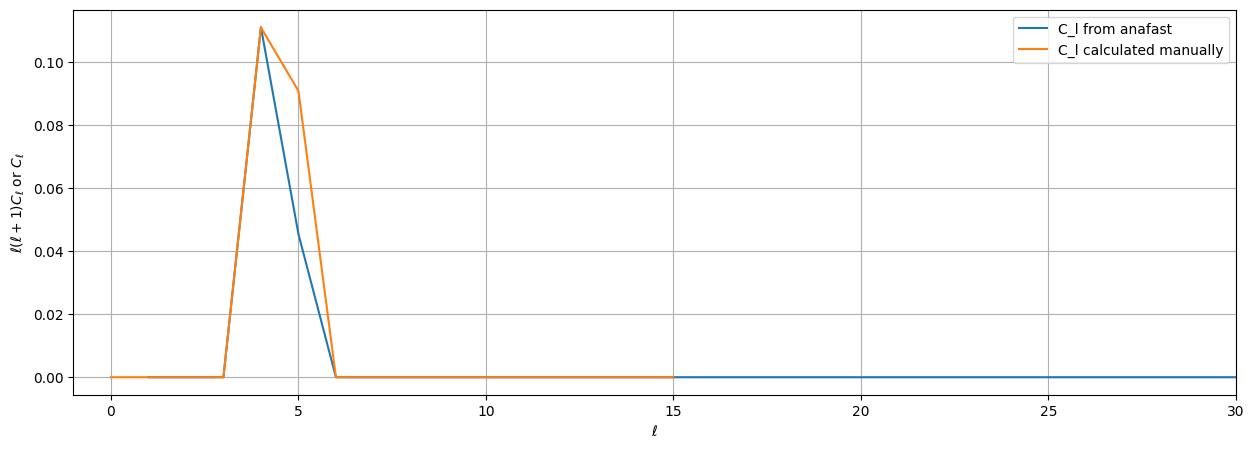

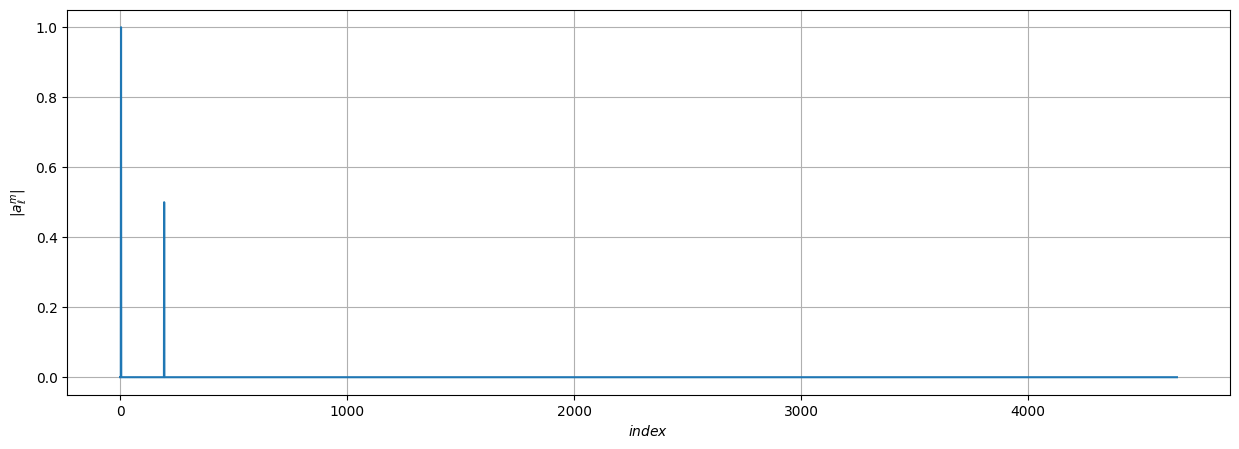

In [15]:
cl5, alm1 = hp.anafast(sphere_f, alm =True)
ell5 = np.arange(len(cl5))
index = np.arange(len(alm1))
print(l_m, C_l)

k=0
# for l in range(0, l_max+1):
#     for m in range(-l, l + 1):
for i in index:  # Get the index for (l, m)
    if np.abs(alm1[i]) > 0.3:
        l,m = l_m[k]
        k+= 1
        # i = hp.Alm.getidx(len(cl5)- 1, l , m )
        index2 = hp.Alm.getlm(len(cl5)- 1, i)

        print(f"{l}, {m} - - alm1[{i}] = {np.abs(alm1[i]):.2f} and calculated index: {index2}")

c_l_calculated  = np.array([x for x in C_l.values()])
k = np.array([i for i in range(l_max+1)])
print(c_l_calculated, k)

plt.figure(figsize=(15, 5))
# plt.plot(ell5[1:], (ell5 * (ell5 + 1) * cl5)[1:], label = "l(l+1)C_l from anafast")
# plt.plot(k, (k*(k+1)*c_l_calculated), label = "l(l+1)C_l Calculated manually")
plt.plot(ell5[1:], (cl5)[1:], label = "C_l from anafast")
plt.plot(k, c_l_calculated, label = 'C_l calculated manually')
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$ or $ C_{\ell}$")
plt.xlim(-1, 3*max_l)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(index, np.abs(alm1))
# plt.plot(index[:-1], (np.abs(alm2))[:-1], "--")
plt.xlabel("$index$")
plt.ylabel("$|a_{\ell}^{m}|$")
# plt.xlim(-1, 30*max_l)
plt.grid()
plt.show()

In [16]:
# wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")
# mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool_)
# wmap_map_I_masked = hp.ma(wmap_map_I)
# wmap_map_I_masked.mask = np.logical_not(mask)

In [17]:
# Load WMAP Healpix data (replace with actual data loading if necessary)
# nside = hp.get_nside(wmap_map_I)  # Get nside directly from the WMAP map
# npix = hp.nside2npix(nside)

# # Healpix data (e.g., CMB intensity or temperature anisotropies)
# wmap_map_I  # Assuming wmap_map_I is a Healpix map

# # Convert Healpix pixel indices to angles (theta, phi)
# theta, phi = hp.pix2ang(nside, np.arange(npix))

# # plot_healpix(wmap_map_I,theta, phi)

In [18]:
# Generate Healpix data (NSIDE must be a power of 2)
# nside = 32  # Resolution of the Healpix map
# npix = hp.nside2npix(nside)
# healpix_data = np.random.rand(npix)  # Example: random data for each pixel

# # Convert Healpix pixel indices to angles (theta, phi)
# theta3, phi3 = hp.pix2ang(nside, np.arange(npix))

# plot_healpix(healpix_data, theta3, phi3)



# Reconstructing the Field from C_l or A_l_m

In [19]:
def generate_field_from_cl(cl, nside):
    # l_max = len(cl)-1
    # Generate the field from the cl coefficients
    healpix_map = hp.synfast(cl, nside=nside)
    return healpix_map

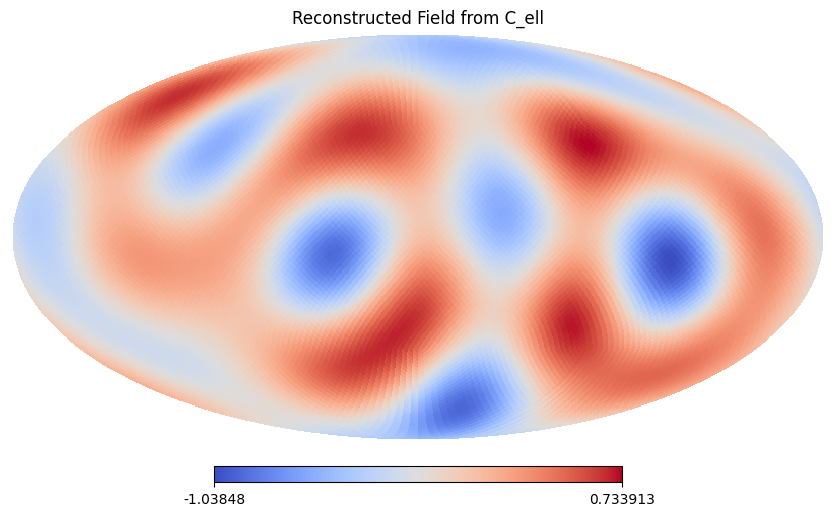

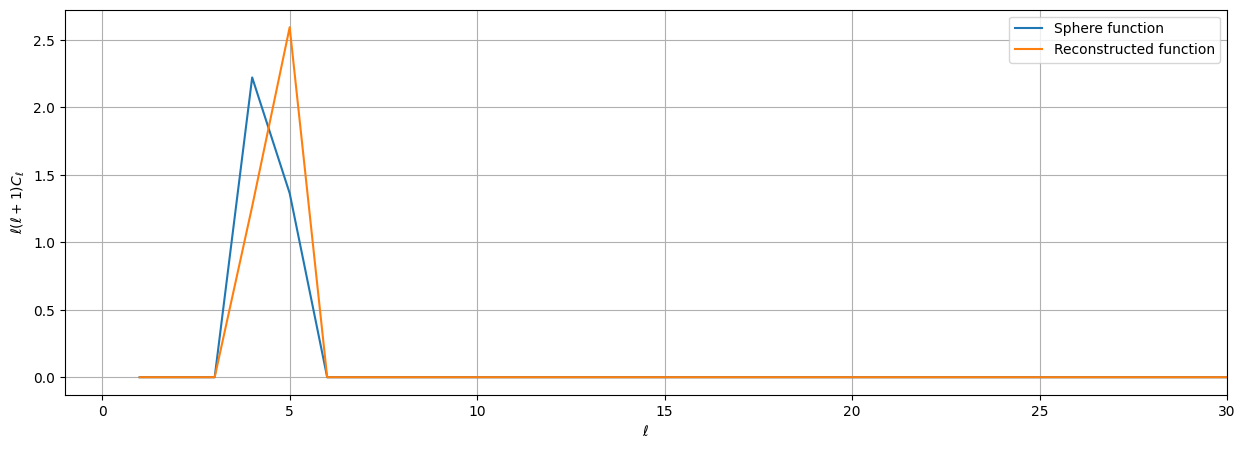

In [20]:
recons_field = generate_field_from_cl(cl5, nside)
# Plot the field
hp.mollview(recons_field, title="Reconstructed Field from C_ell", cmap="coolwarm")
plt.show()

cl6, alm2 = hp.anafast(recons_field, alm =True)
ell6 = np.arange(len(cl6))
index = np.arange(len(alm2))


plt.figure(figsize=(15, 5))
plt.plot(ell5[1:], (ell5 * (ell5 + 1) * cl5)[1:], label = "Sphere function")
plt.plot(ell6[1:], (ell6 * (ell6 + 1) * cl6)[1:], label = "Reconstructed function")
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.xlim(-1, 3*max_l)
plt.legend()
plt.grid()
plt.show()

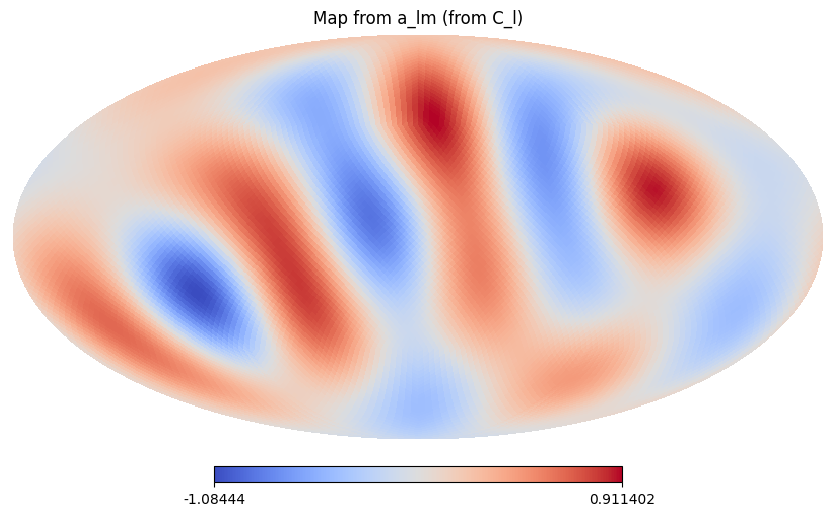

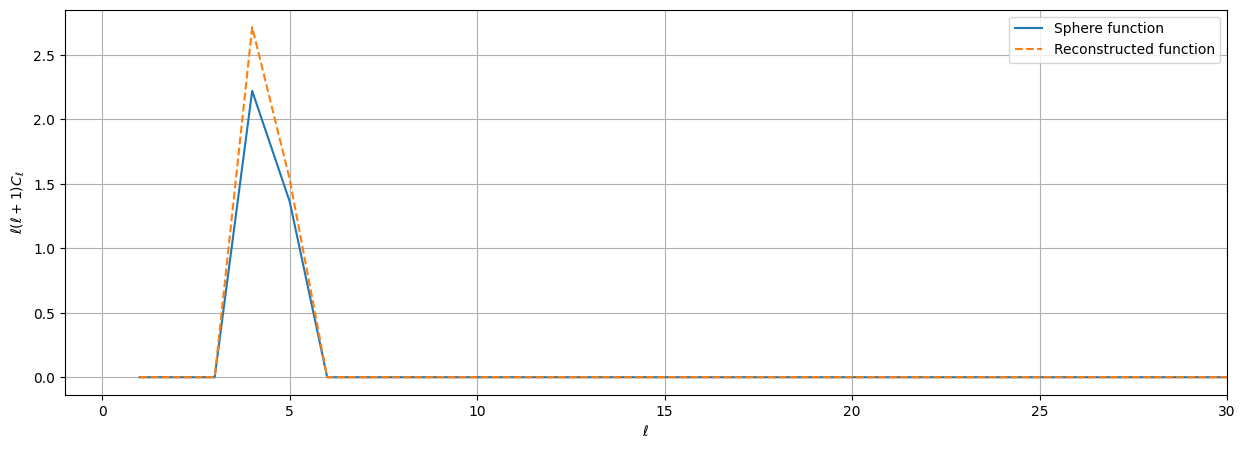

In [21]:
# Get random alm from Cl, then reconstruct the field
Cl = cl5  # Simplified example, replace with actual Cl values
l_max = len(Cl) - 1

# Generate random alm coefficients using the Cl values
alm = np.zeros(hp.Alm.getsize(l_max), dtype=complex)
for l in range(0, l_max):
    m_values = np.arange(-l, l + 1)
    for m in m_values:
        # Sample the real and imaginary parts from normal distributions
        # The variance is given by C_l / 2 for each real and imaginary part
        variance = Cl[l] / 2
        real_part = np.random.normal(0, np.sqrt(variance))
        imag_part = np.random.normal(0, np.sqrt(variance))
        i = hp.Alm.getidx(l_max, l , abs(m) )
        # index2 = hp.Alm.getlm(l_max, i)
        alm[i] = real_part + 1j * imag_part
        # print(f"{l}, {m} - - alm1[{i}] = {np.abs(alm1[i]):.2f} and calculated index: {index2}")


# Convert list to a numpy array
alm = np.array(alm)

recons_field = hp.alm2map(alm, nside)

# Plot the generated map
hp.mollview(recons_field, title="Map from a_lm (from C_l)", cmap="coolwarm")
cl6, alm2 = hp.anafast(recons_field, alm =True)
ell6 = np.arange(len(cl6))
index = np.arange(len(alm2))


plt.figure(figsize=(15, 5))
plt.plot(ell5[1:], (ell5 * (ell5 + 1) * cl5)[1:], label = "Sphere function")
plt.plot(ell6[1:], (ell6 * (ell6 + 1) * cl6)[1:], "--",label = "Reconstructed function")
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.xlim(-1, 3*max_l)
plt.legend()
plt.grid()
plt.show()


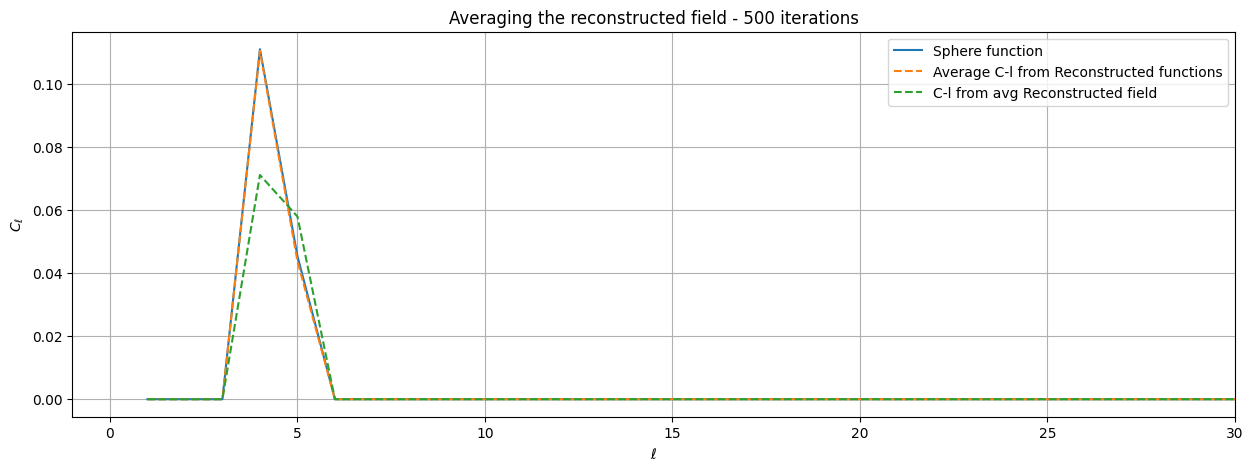

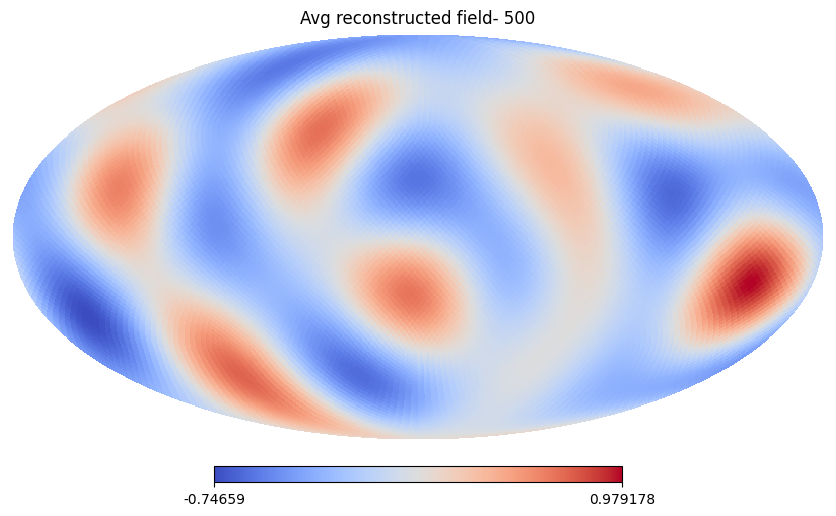

In [22]:
Sum_cl = np.zeros(len(cl5))
Sum_recons_field = np.zeros(len(recons_field))
n = 500

plt.figure(figsize=(15, 5))
plt.plot(ell5[1:], (cl5)[1:], label = "Sphere function")

for x in range(n):
    recons_fieldx = generate_field_from_cl(cl5, nside)
    Sum_recons_field += recons_fieldx
    clx = hp.anafast(recons_fieldx)
    Sum_cl += clx
    # plt.plot( np.arange(len(clx)), clx,  "--", color = "black", linewidth = 0.5, alpha = 0.5 )

avg_recons_field = Sum_recons_field/np.sqrt(n)

cl7= Sum_cl/n
cl8 = hp.anafast(avg_recons_field)
ell7 = np.arange(len(cl7))

plt.plot(ell7[1:], (cl7)[1:], "--", label = "Average C-l from Reconstructed functions")
plt.plot(ell7[1:], (cl8)[1:], "--", label = "C-l from avg Reconstructed field")

plt.xlabel("$\ell$")
plt.ylabel("$C_{\ell}$")
plt.xlim(-1, 3*max_l)
plt.legend()
plt.title(f"Averaging the reconstructed field - {n} iterations")
plt.grid()
plt.show()

hp.mollview(avg_recons_field, title=f"Avg reconstructed field- {n}", cmap="coolwarm")

In [23]:
def generate_field_from_alm(alm, nside):
    # Generate the field from the alm coefficients
    healpix_map = hp.alm2map(alm, nside=nside)


    return healpix_map

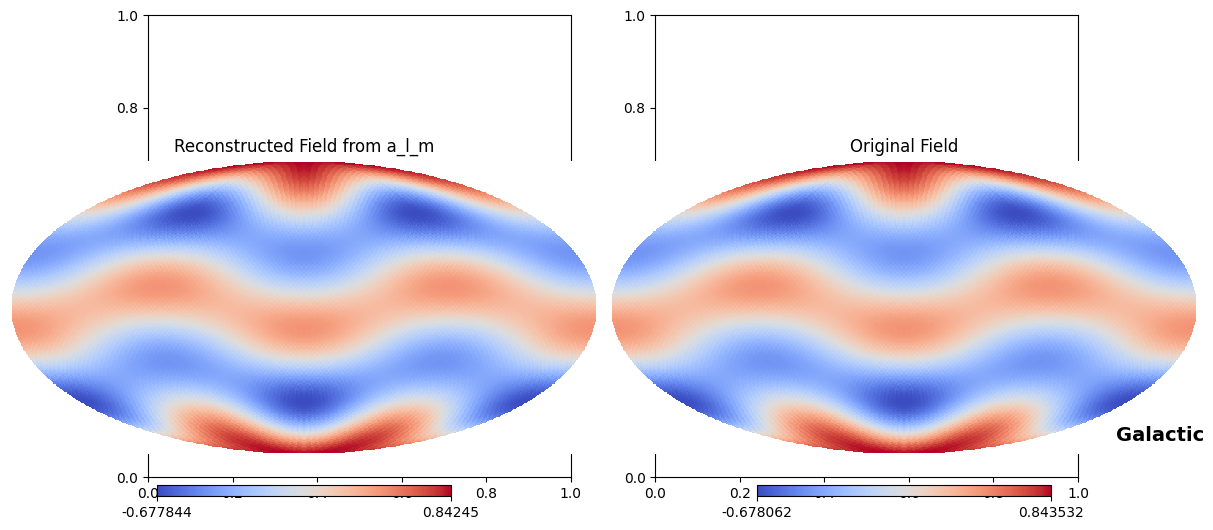

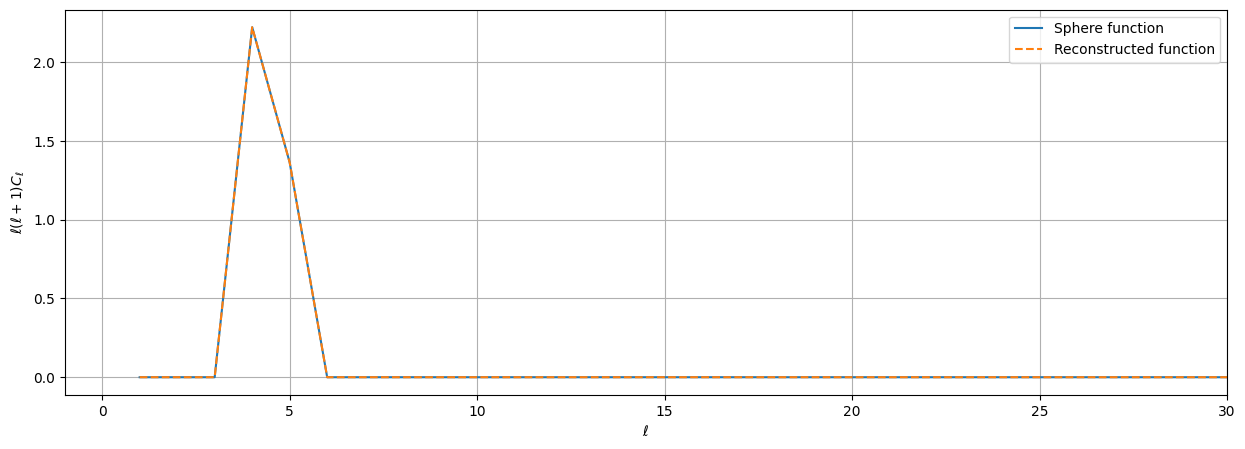

In [24]:
# Generate the field
recons_field = generate_field_from_alm(alm1, nside)

nside = hp.get_nside(recons_field)  # Get nside directly from the WMAP map
npix = hp.nside2npix(nside)
theta4, phi4 = hp.pix2ang(nside, np.arange(npix))

# Plot the field
# Plot original and rotated maps for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
hp.mollview(recons_field, title="Reconstructed Field from a_l_m", cmap = "coolwarm", sub=(1, 2, 1))
hp.mollview(sphere_f.real, coord=["G"], title="Original Field", cmap='coolwarm', sub=(1, 2, 2))
# plot_healpix(recons_field, theta4, phi4)
plt.show()

cl6, alm2 = hp.anafast(recons_field, alm =True)
ell6 = np.arange(len(cl6))
index = np.arange(len(alm2))


plt.figure(figsize=(15, 5))
plt.plot(ell5[1:], (ell5 * (ell5 + 1) * cl5)[1:], label = "Sphere function")
plt.plot(ell6[1:], (ell6 * (ell6 + 1) * cl6)[1:], "--",label = "Reconstructed function")
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.xlim(-1, 3*max_l)
plt.legend()
plt.grid()
plt.show()


In [25]:
from scipy.special import legendre
from scipy.integrate import quad

def c_theta_to_cl(c_theta, l_max, theta_vals):
    cl = []
    for l in range(l_max + 1):
        P_l = legendre(l)  # Legendre polynomial
        integrand = lambda theta: c_theta(theta) * P_l(np.cos(theta)) * np.sin(theta)
        c_l_val = (2 * l + 1) / (4 * np.pi) * quad(integrand, 0, np.pi)[0]
        cl.append(c_l_val)
    return np.array(cl)


768 16
[0.86008806 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

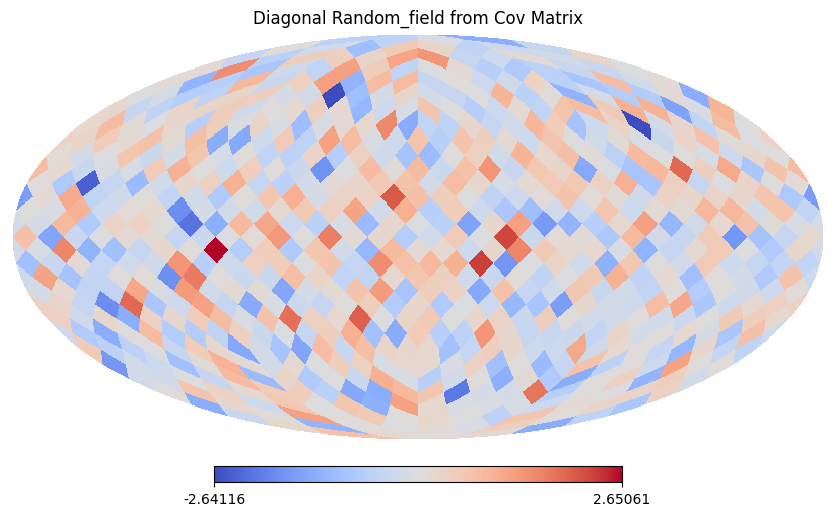

In [26]:
def generate_random_field_from_cov(cov_matrix, size):
    mean = np.zeros(size)
    field = np.random.multivariate_normal(mean, cov_matrix)
    return field

# npix = hp.nside2npix(16)
npix = hp.nside2npix(8)
size = 2*hp.npix2nside(npix)
print(npix, size)
diagonal_values = np.random.rand(npix)
matrix = np.diag(diagonal_values)
print(matrix[0])
random_field_new = generate_random_field_from_cov(matrix, npix)
print("random field generated")
hp.mollview(random_field_new, title="Diagonal Random_field from Cov Matrix", cmap='coolwarm')

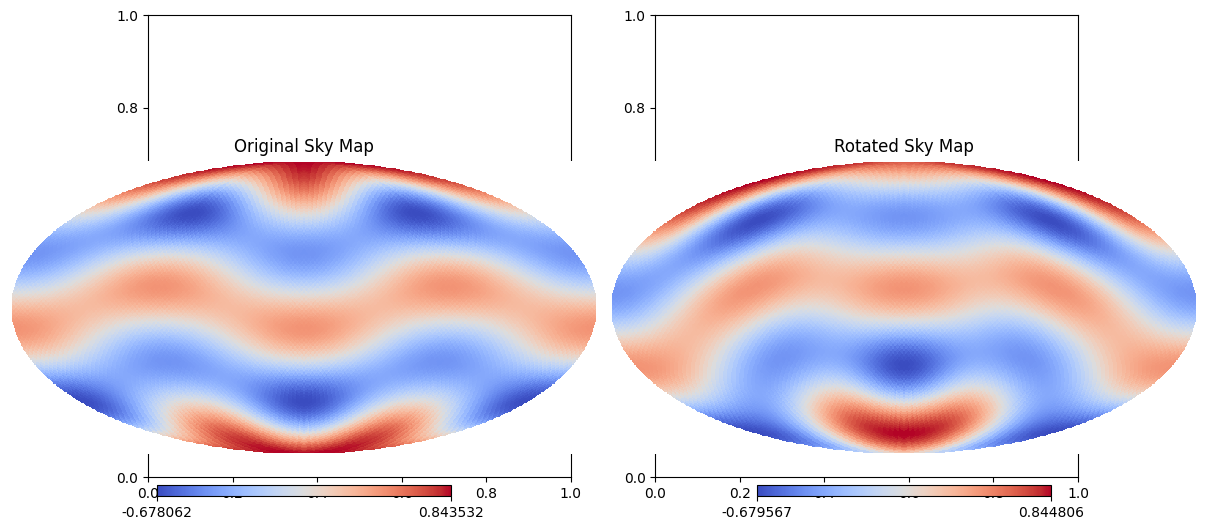

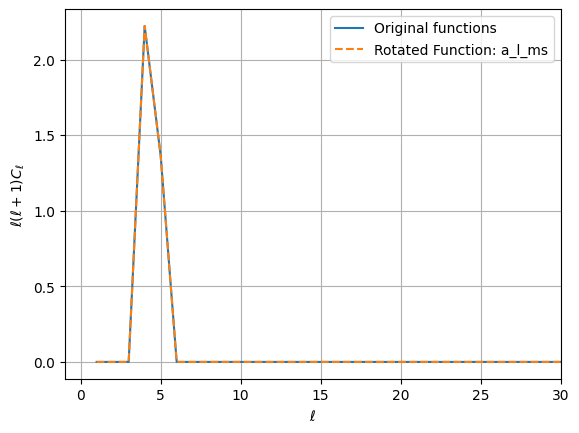

-0.00018450967812719268


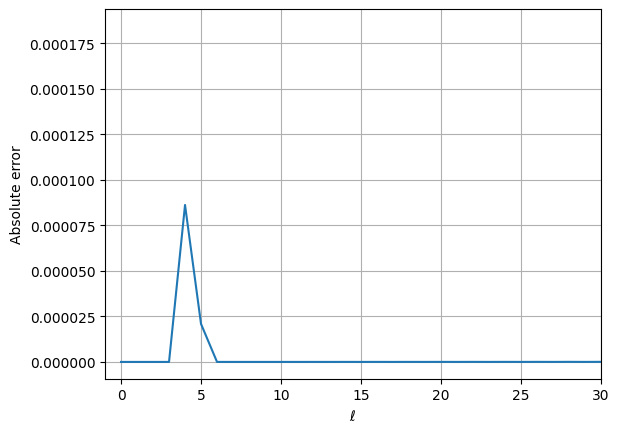